# Figure 1

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## a) BigBrain map of cortical layers
Screenshot from the BigBrain [web viewer](https://interactive-viewer.apps.hbp.eu/#/a:juelich:iav:atlas:v1.0.0:1/t:minds:core:referencespace:v1.0.0:a1655b99-82f1-420f-a3c2-fe80fd4c8588/p:juelich:iav:atlas:v1.0.0:3/@:0.0.0.-W000.._eCwg.2-FUe3._-s_W.2_evlu..7LIx..2eee0~.1HOUW~.LVQu..Rfu) (at X = -44.207)

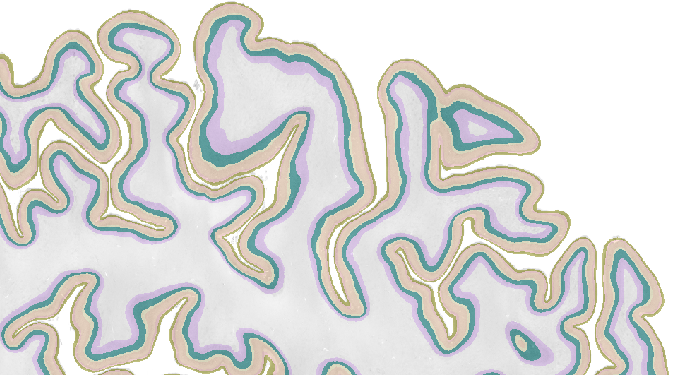

In [2]:
laminar_thickness_orig = helpers.downsample(datasets.load_laminar_thickness(normalize_by_total_thickness=False))

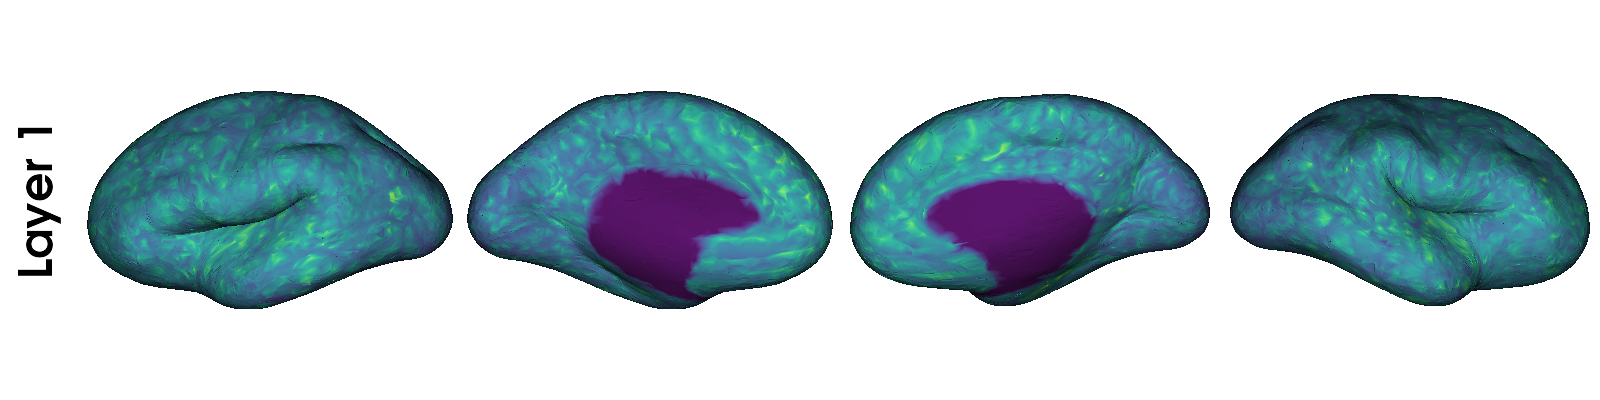

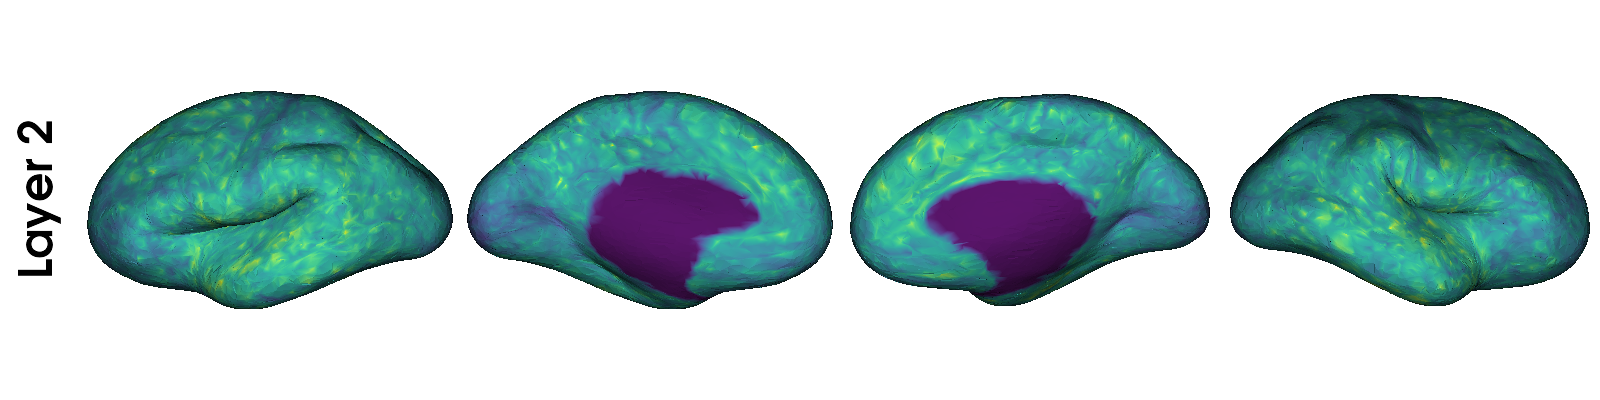

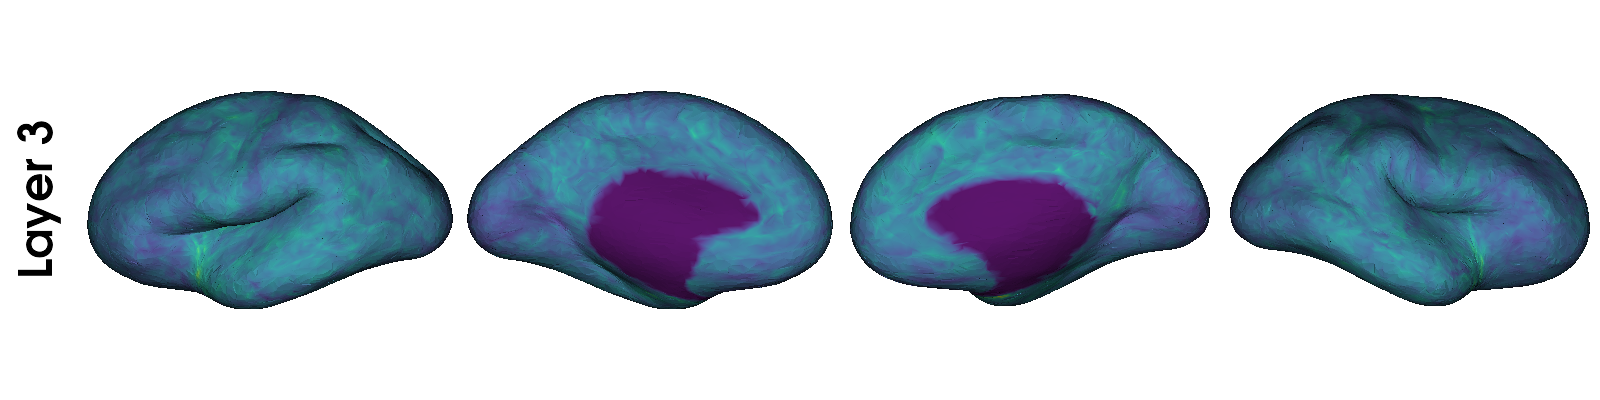

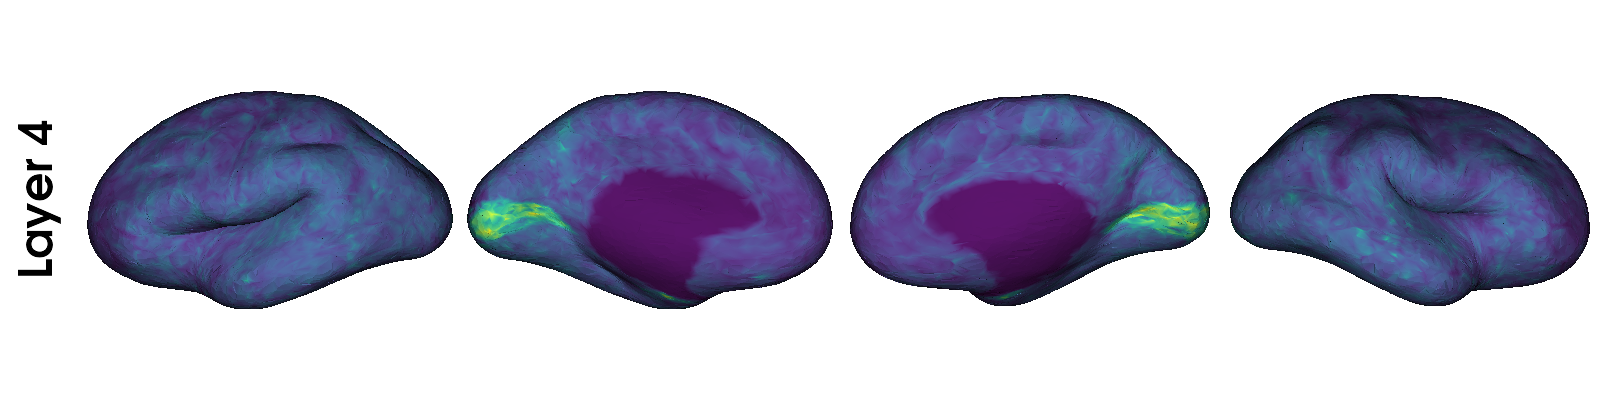

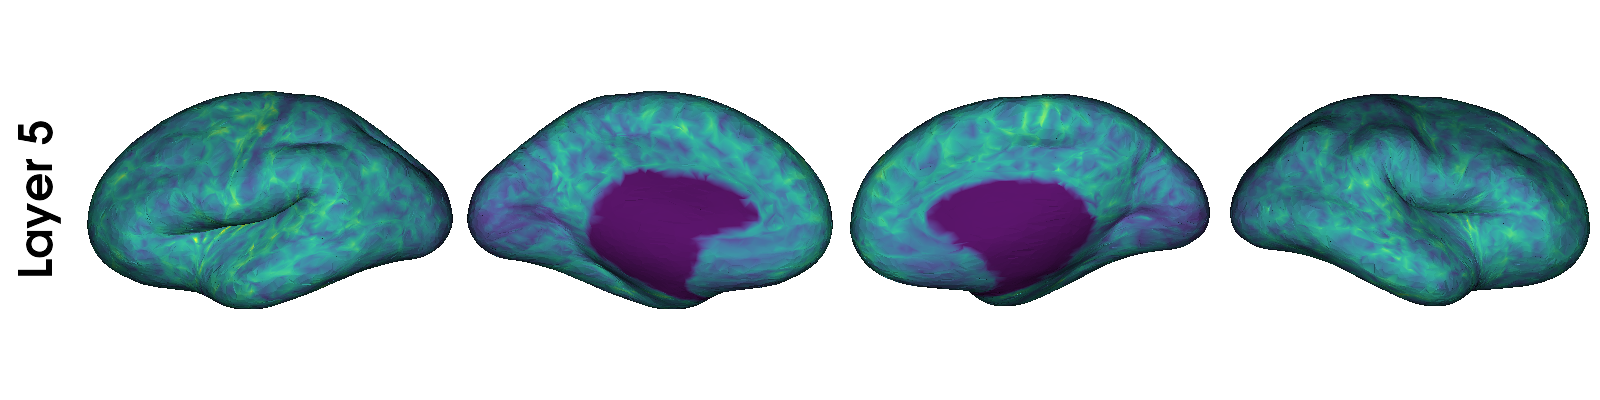

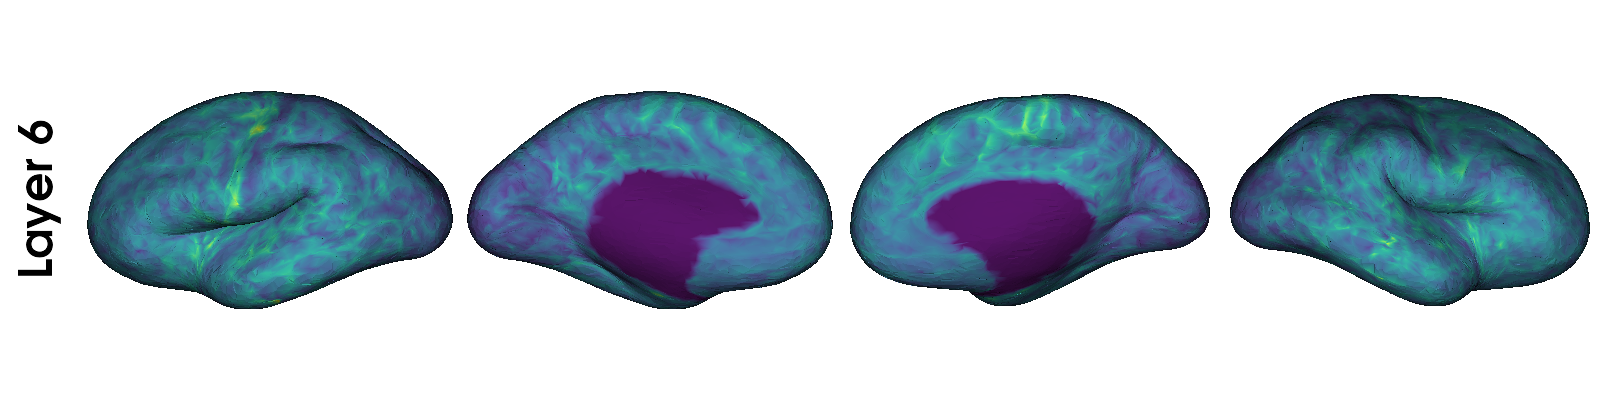

In [3]:
for num in range(1, 7):
    p = helpers.plot_surface(
        np.concatenate([laminar_thickness_orig['L'][:, num-1], laminar_thickness_orig['R'][:, num-1]]),
        inflate=True,
        label_text={'left':[f'Layer {num}']},
    )
    display(p)

## b) Pre-processing steps

Map of cortical types

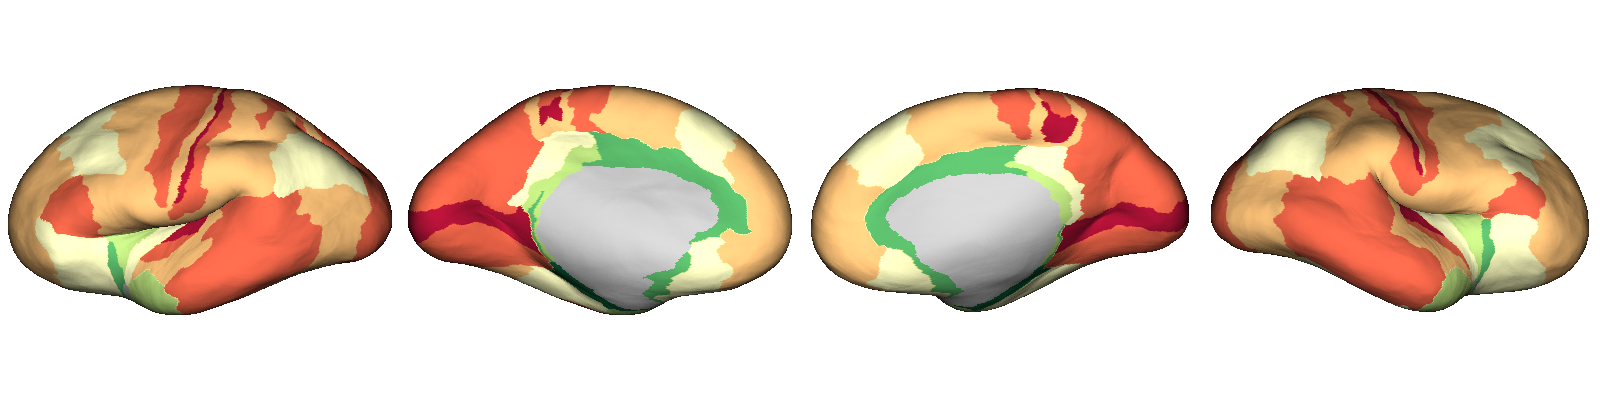

In [4]:
ctypes = surfaces.CorticalTypes(exc_regions=None, downsampled=False)

helpers.plot_surface(
    ctypes.surf_data,
    inflate=True,
    cmap='RdYlGn_r',
    plot_downsampled=False,
)

Note: The mask on the figure is created manually

Smoothing disc

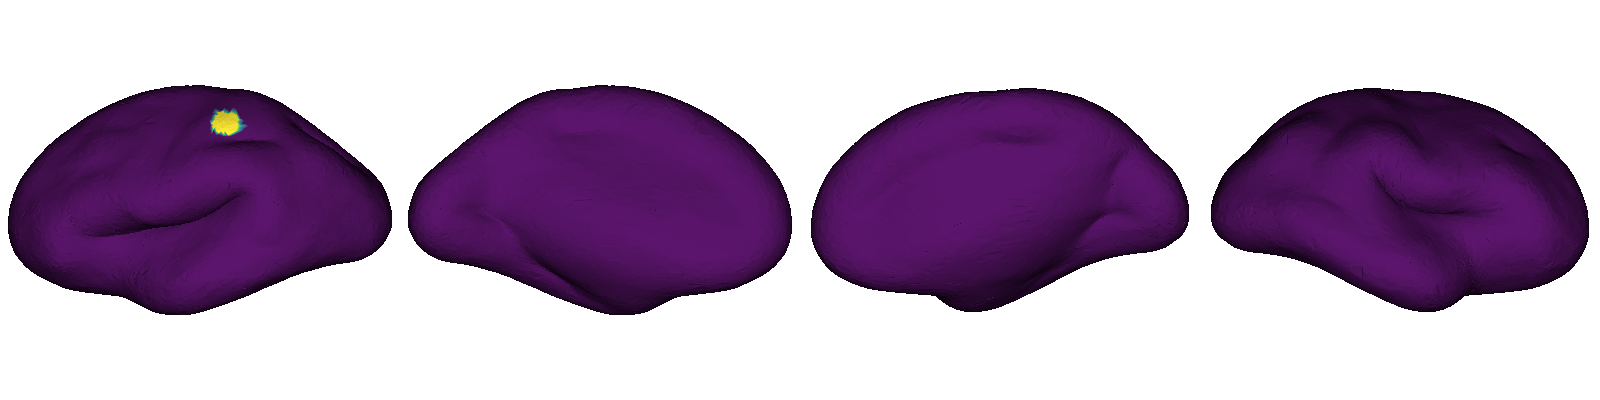

In [5]:
smoothed_laminar_thickness, discs = helpers.disc_smooth(laminar_thickness_orig, 10)

helpers.plot_surface(
    np.concatenate([discs['L'][2000].astype('int')*30, np.zeros(datasets.N_VERTICES_HEM_BB_ICO5)]),
    layout_style='row',
    inflate=True
)

Total thickness

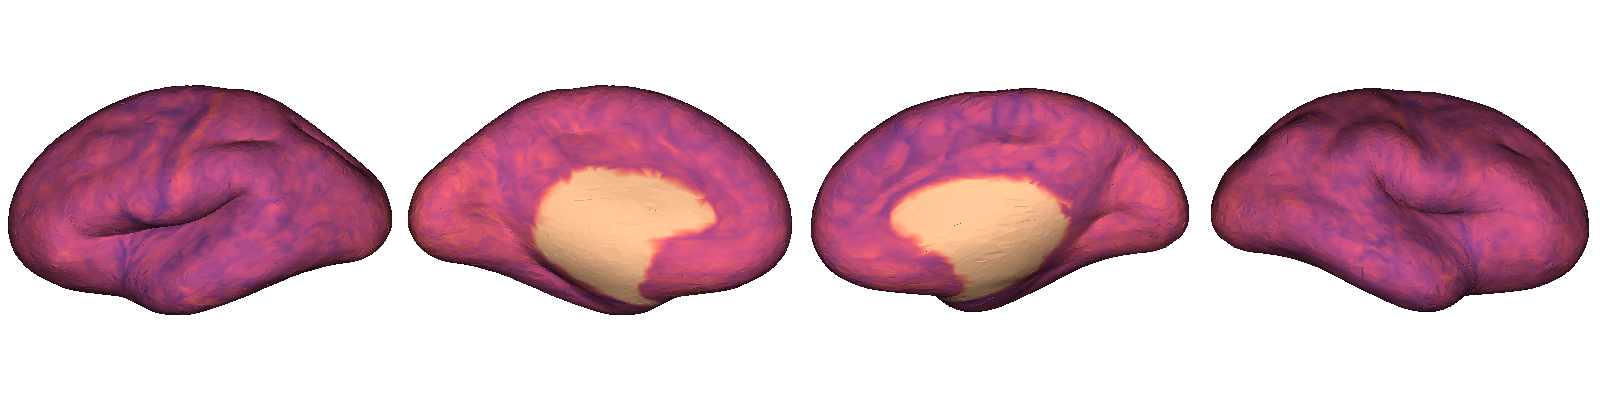

In [6]:
total_thickness = np.concatenate([laminar_thickness_orig['L'], laminar_thickness_orig['R']]).sum(axis=1)
helpers.plot_surface(
    total_thickness,
    inflate=True,
    cmap='flare',
)

SJH Parcellation map

Created using Surf Ice (1.0.20211006+ 64-bit ARM Cocoa LLVM StaticPythonBridge) by plotting the overlay of `src/tpl-bigbrain_hemi-L_desc-sjh_parcellation.label.gii` on the `src/tpl-bigbrain_hemi-L_desc-mid.surf.inflate.gii`

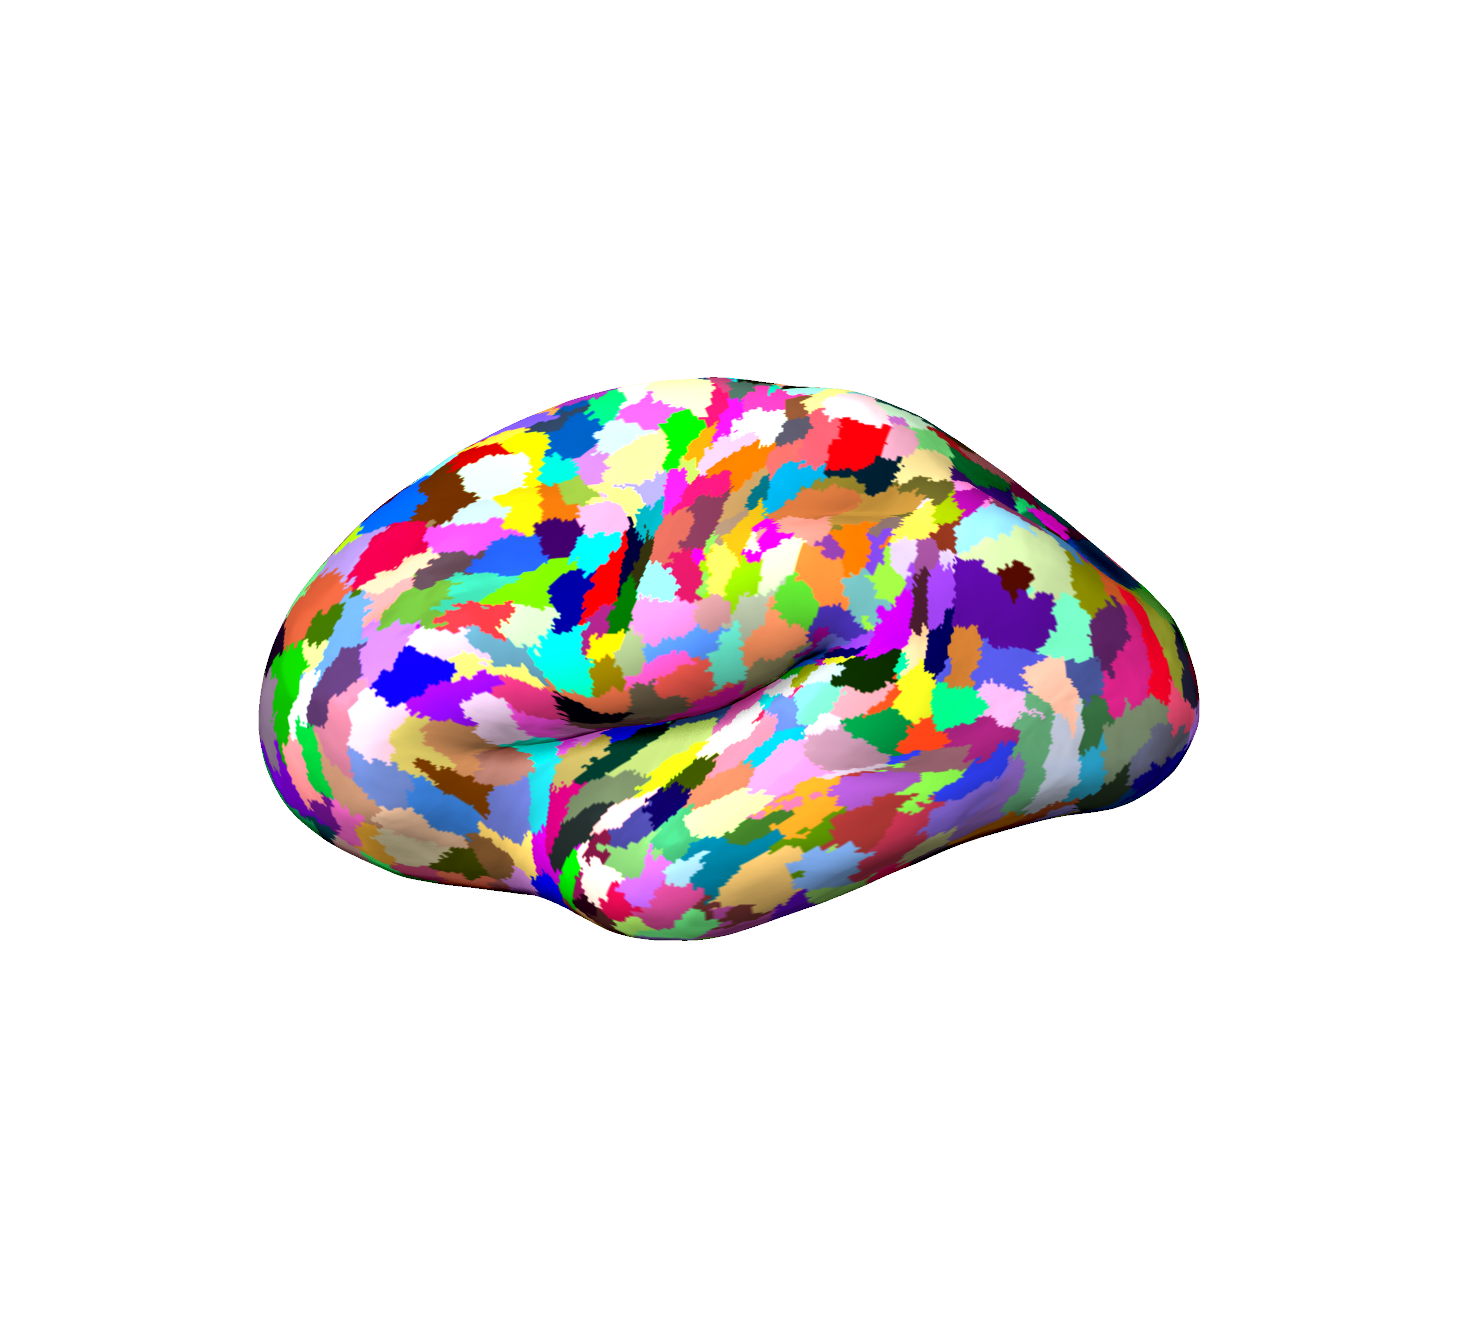

## c) Parcellated laminar thickness profiles

In [7]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', parcellation_name='sjh')

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/code/figures/../matrices.py:1505: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(concat_parcellated_input_data.index.tolist(), rotation=90)


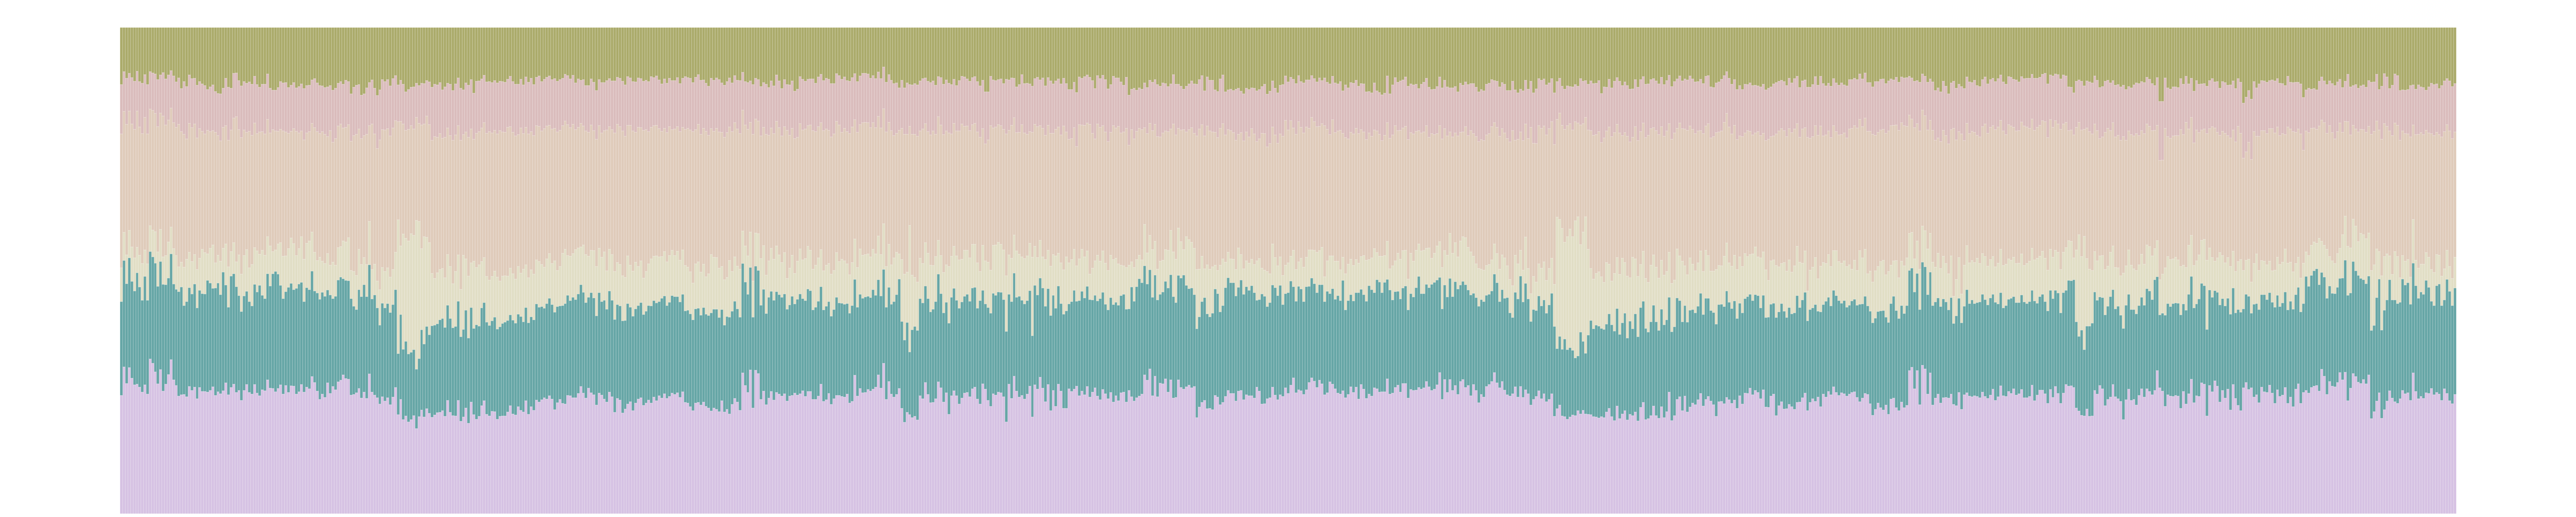

In [8]:
ltc.plot_parcels_profile()

## d) Laminar thickness covariance matrix

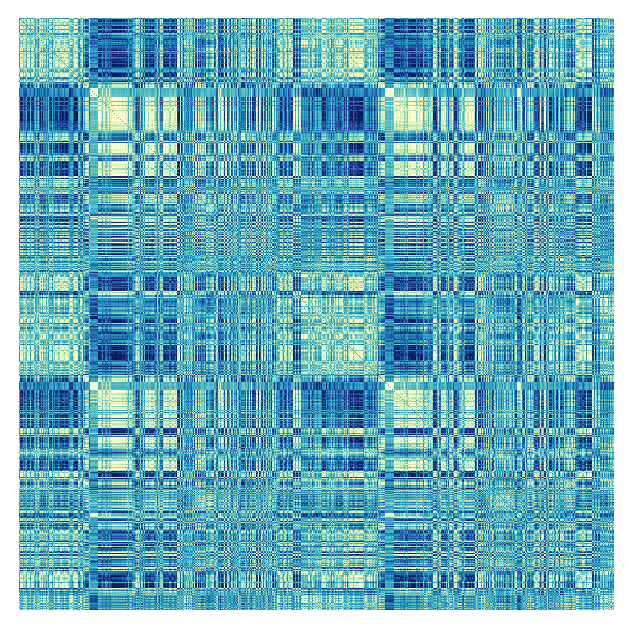

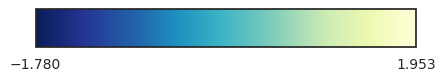

In [9]:
ltc.plot()

## e) Laminar thickness covariance gradient

In [10]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


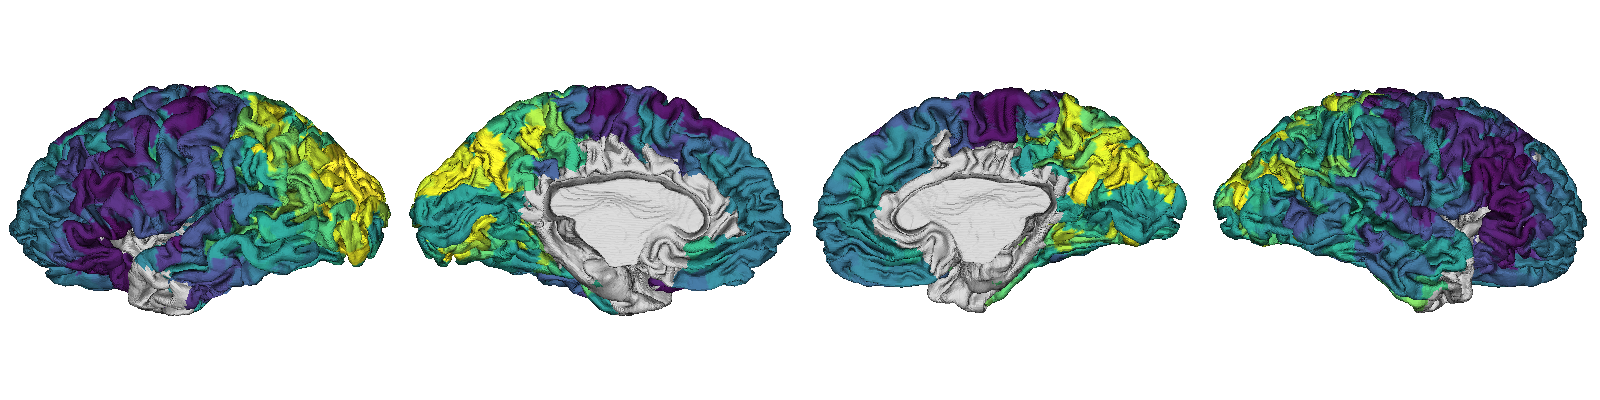

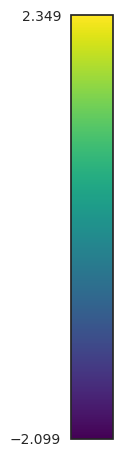

In [11]:
ltcg.plot(columns=['LTC G1'], cbar=True)

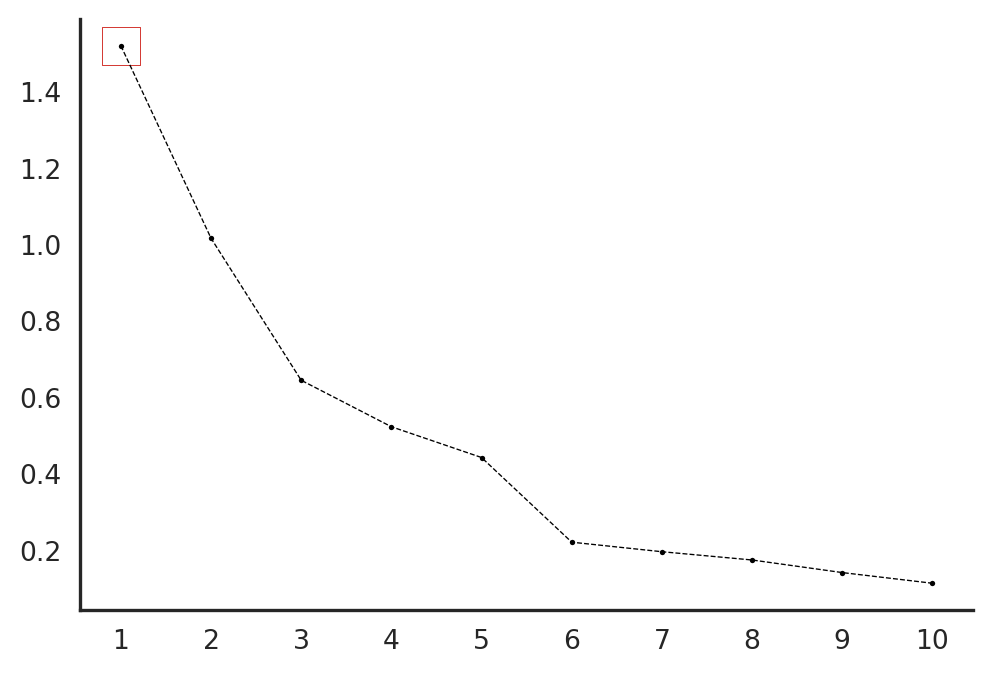

In [12]:
ltcg.plot_scree()

In [13]:
ltcg_max = surfaces.MicrostructuralCovarianceGradients(ltc, n_components_create=ltc.matrix.shape[0])
print('Variance explained by LTC G1: ', ltcg_max.lambdas[0] / ltcg_max.lambdas.sum())

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Variance explained by LTC G1:  0.2811581179669255


## f) LTC reordered by LTC G1

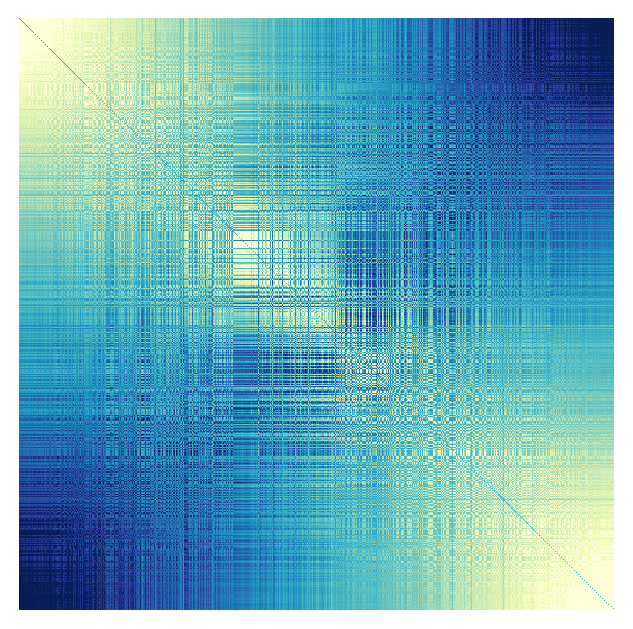

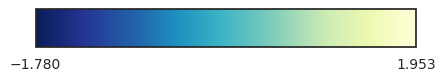

In [14]:
ltcg.plot_reordered_matrix()

## g) Relative thickness of individual layers across LTC G1

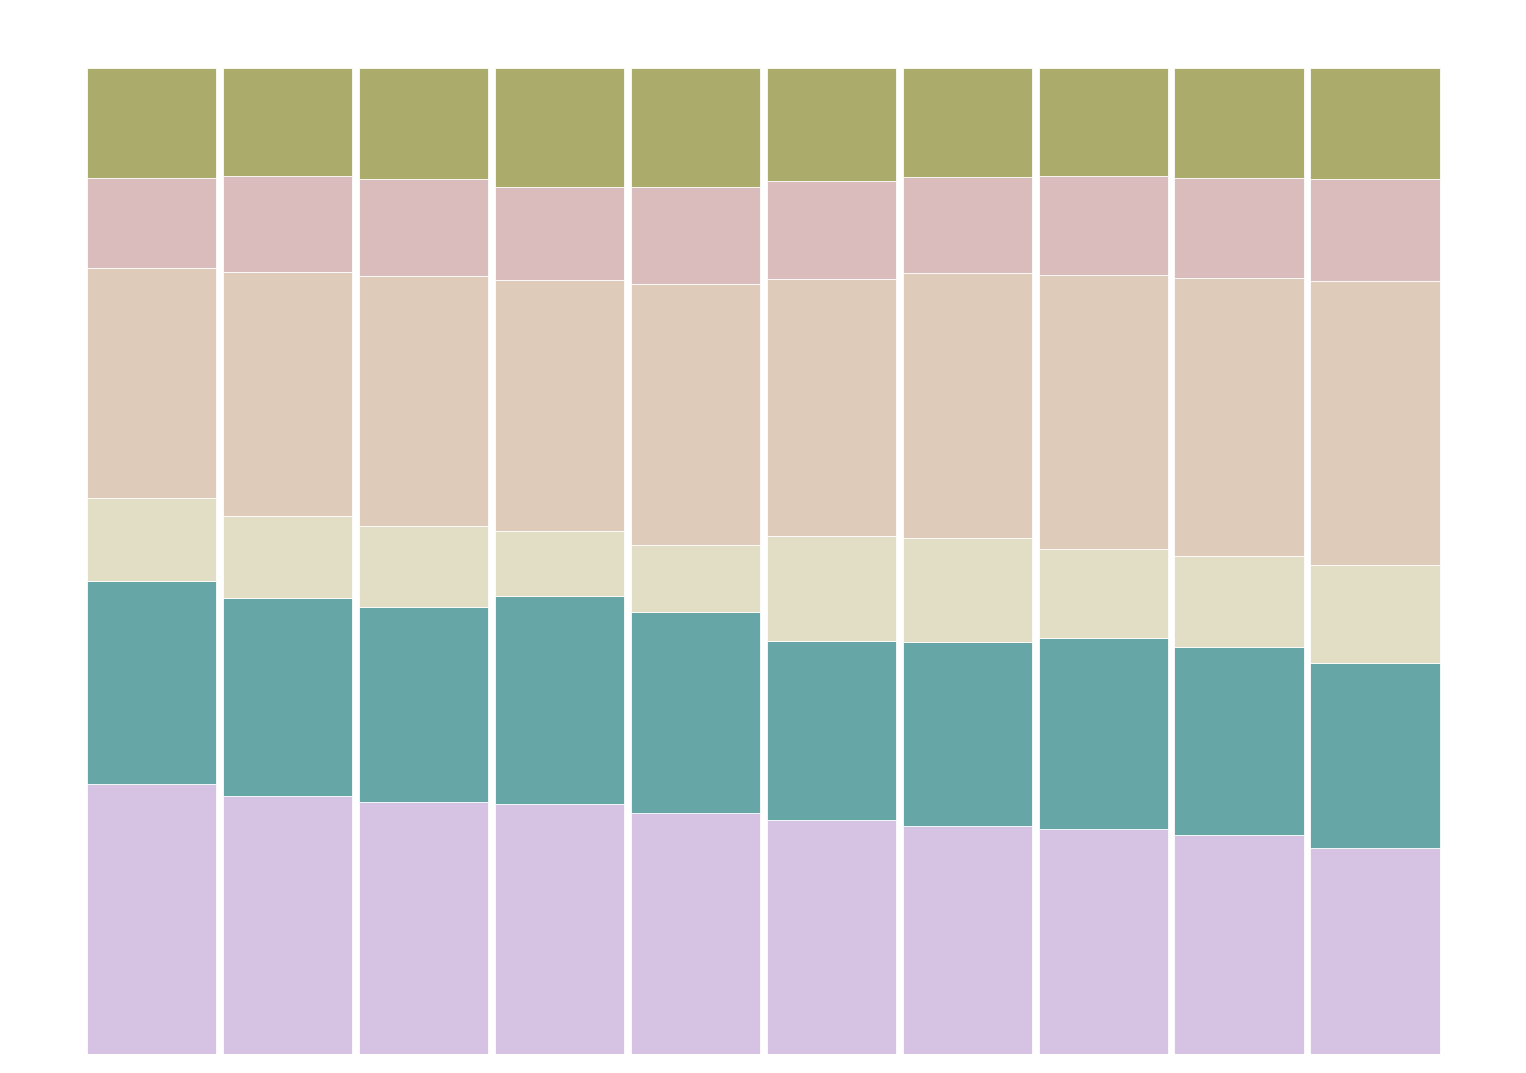

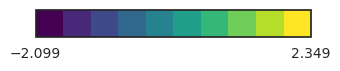

In [15]:
ltcg.plot_binned_profile()

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/gradients_approach-pca_kernel-normalized_angle_sparsity-09_n-10/variogram_surrogates_LTC G1_nperm-1000_nparcels-895.npz and have the same parcels

Correlation coefficients


LTC G1
Layer 1 relative thickness -0.055018
Layer 2 relative thickness  0.428395
Layer 3 relative thickness  0.737988
Layer 4 relative thickness  0.194882
Layer 5 relative thickness -0.336788
Layer 6 relative thickness -0.815794


p-values


LTC G1
Layer 1 relative thickness   0.787
Layer 2 relative thickness   0.000
Layer 3 relative thickness   0.000
Layer 4 relative thickness   0.353
Layer 5 relative thickness   0.020
Layer 6 relative thickness   0.000

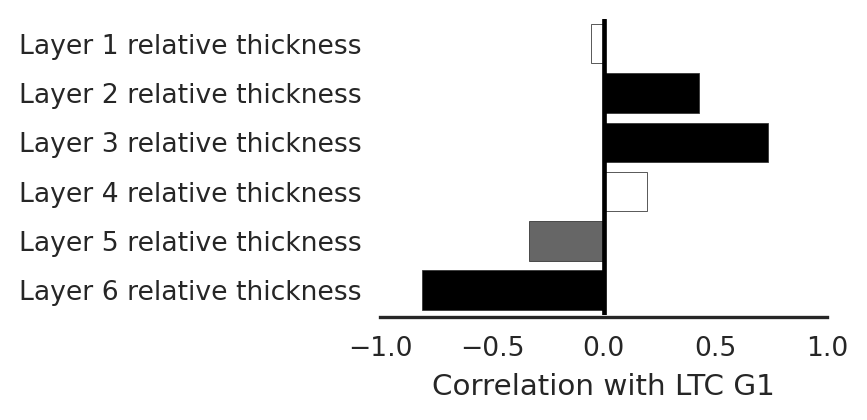

In [16]:
laminar_features = surfaces.LaminarFeatures(parcellation_name='sjh')
r, p = ltcg.correlate(
    laminar_features, 
    x_columns=['LTC G1'], 
    y_columns=[f'Layer {n} relative thickness' for n in range(1, 7)],
    regplot=False
)
print("\nCorrelation coefficients")
display(r)
print("\np-values")
display(p)